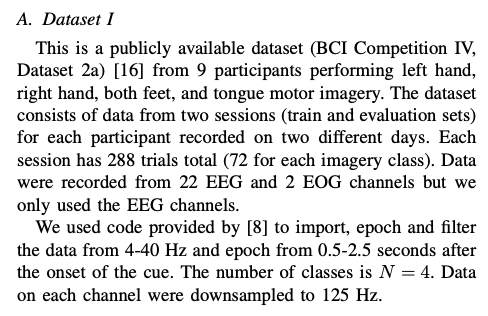

In [2]:
%matplotlib qt5
import mne
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import Image
Image(filename='datastuff.png')

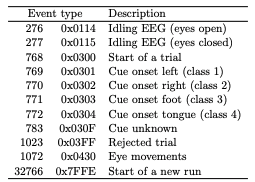

In [4]:
Image(filename='eventcode.png')

In [5]:
event_map = {
    '276' : 'eyes_open',
    '277' : 'eyes_closed',
    '768' : 'start_a_trial',
    '769' : 'cue_onset_left',
    '770' : 'cue_onset_right',
    '771' : 'cue_onset_foot',
    '772' : 'cue_onset tongue',
    '783' : 'cue_unknown',
    '1023': 'rejected_trial',
    '1072': 'eye_movements',
    '32766': 'start_of_new_run'
}

In [38]:
#excluding the EOG channels doesn't seem to work...deal with later
raw = mne.io.read_raw_gdf("data/A01T.gdf", preload=True, stim_channel='auto')
print(f"EEG channels and length {raw['data'][0].shape}")

events, event_id = mne.events_from_annotations(raw)
print(f"Number of events {events.shape[0]}")

#events has form (time, 0, event_id)

#create mapping of event_id value to event description
id_map = {}
for key, value in event_id.items():
    id_map[value] = event_map[key]
print(id_map)

Extracting EDF parameters from /Users/noahcarniglia/189project/data/A01T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/Users/noahcarniglia/anaconda3/lib/python3.7/site-packages/mne/io/edf/edf.py:996: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
<ipython-input-38-017b1066ed21>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_gdf("data/A01T.gdf", preload=True, stim_channel='auto')


EEG channels and length (25, 672528)
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Number of events 603
{1: 'rejected_trial', 2: 'eye_movements', 3: 'eyes_open', 4: 'eyes_closed', 5: 'start_of_new_run', 6: 'start_a_trial', 7: 'cue_onset_left', 8: 'cue_onset_right', 9: 'cue_onset_foot', 10: 'cue_onset tongue'}


In [39]:
event_id

{'1023': 1,
 '1072': 2,
 '276': 3,
 '277': 4,
 '32766': 5,
 '768': 6,
 '769': 7,
 '770': 8,
 '771': 9,
 '772': 10}

In [10]:
id_map

{1: 'rejected_trial',
 2: 'eye_movements',
 3: 'eyes_open',
 4: 'eyes_closed',
 5: 'start_of_new_run',
 6: 'start_a_trial',
 7: 'cue_onset_left',
 8: 'cue_onset_right',
 9: 'cue_onset_foot',
 10: 'cue_onset tongue'}

In [14]:
event_map

{'276': 'eyes_open',
 '277': 'eyes_closed',
 '768': 'start_a_trial',
 '769': 'cue_onset_left',
 '770': 'cue_onset_right',
 '771': 'cue_onset_foot',
 '772': 'cue_onset tongue',
 '783': 'cue_unknown',
 '1023': 'rejected_trial',
 '1072': 'eye_movements',
 '32766': 'start_of_new_run'}

In [40]:
# baseline correction EEG?
epochs = mne.Epochs(raw, events, event_id, tmin=0.5, tmax=2.5, event_repeated='merge', baseline=None, preload=True)

Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
585 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 585 events and 501 original time points ...
0 bad epochs dropped


In [24]:
epochs = epochs.drop_channels(['EOG-left','EOG-central','EOG-right'])

epochs = epochs.resample(125)

epochs = epochs.filter(4,40)

In [37]:
epochs['769'][0]

<Epochs  |   1 events (all good), 0.5 - 2.492 sec, baseline off, ~91 kB, data loaded,
 '769': 1>

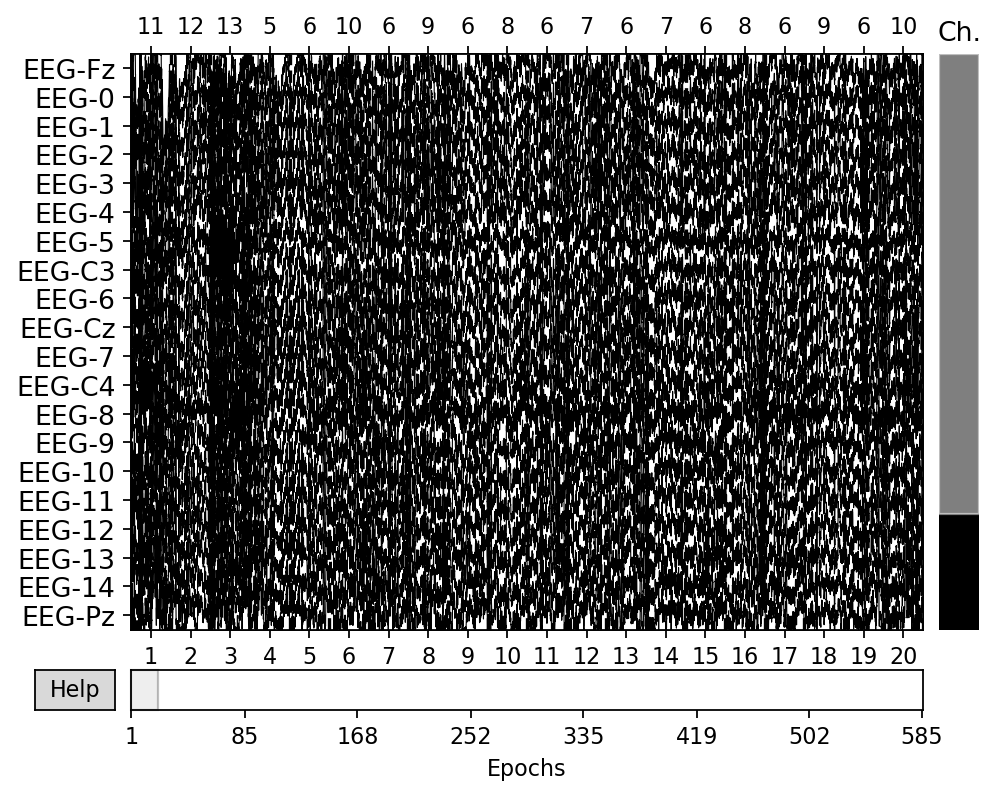

In [42]:
epochs.plot()